# Introduction to `pandas`

:::{note}
This material is mostly adapted from the following resources:
- [Earth and Environmental Data Science: Pandas](https://earth-env-data-science.github.io/lectures/pandas/pandas_intro.html)
- [Python Programming for Data Science: Pandas](https://www.tomasbeuzen.com/python-programming-for-data-science/chapters/chapter7-pandas.html)
:::

<img src="https://pandas.pydata.org/static/img/pandas.svg" width="300px" />

[Pandas](http://pandas.pydata.org/) is a an open source library providing high-performance, easy-to-use data structures and data analysis tools. Pandas is particularly suited to the analysis of _tabular_ data, i.e. data that can can go into a table. In other words, if you can imagine the data in an Excel spreadsheet, then Pandas is the tool for the job.

- A fast and efficient DataFrame object for data manipulation with indexing;
- Tools for reading and writing data: CSV and text files, Excel, SQL;
- Intelligent data alignment and integrated handling of missing data;
- Flexible reshaping and pivoting of data sets;
- Intelligent label-based slicing, indexing, and subsetting of large data sets;
- High performance aggregating, merging, joining or transforming data;
- Hierarchical indexing provides an intuitive way of working with high-dimensional data;
- Time series-functionality: date-based indexing, frequency conversion, moving windows, date shifting and lagging;

<img src="https://media.geeksforgeeks.org/wp-content/cdn-uploads/creating_dataframe1.png" width="720px" />

:::{note}
Documentation for this package is available at https://pandas.pydata.org/docs/.
:::

:::{note}
If you have not yet set up Python on your computer, you can execute this tutorial in your browser via [Google Colab](https://colab.research.google.com/). Click on the rocket in the top right corner and launch "Colab". If that doesn't work download the `.ipynb` file and import it in [Google Colab](https://colab.research.google.com/).

Then install `pandas` and `numpy` by executing the following command in a Jupyter cell at the top of the notebook.

```sh
!pip install pandas numpy
```
:::

In [1]:
import pandas as pd
import numpy as np

## Pandas Data Structures: Series

A Series represents a one-dimensional array of data. The main difference between a Series and numpy array is that a Series has an **index**. The index contains the labels that we use to access the data.

There are many ways to [create a Series](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#series). We will just show a few. The core constructor is [`pd.Series()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html).

(Data are from Wikipedia's [List of power stations in Germany](https://en.wikipedia.org/wiki/List_of_power_stations_in_Germany#Nuclear).)

In [2]:
names = ["Neckarwestheim", "Isar 2", "Emsland"]
values = [1269, 1365, 1290]
s = pd.Series(values, index=names)
s

Neckarwestheim    1269
Isar 2            1365
Emsland           1290
dtype: int64

In [3]:
dictionary = {
    "Neckarwestheim": 1269,
    "Isar 2": 1365,
    "Emsland": 1290,
}
s = pd.Series(dictionary)
s

Neckarwestheim    1269
Isar 2            1365
Emsland           1290
dtype: int64

In [19]:
s.loc["Emsland"]

1290

In [6]:
type(s)

pandas.core.series.Series

Arithmetic operations and most `numpy` functions can be applied to `pd.Series`.
An important point is that the Series keep their index during such operations.

In [7]:
s

Neckarwestheim    1269
Isar 2            1365
Emsland           1290
dtype: int64

In [13]:
np.mean(s)

1308.0

In [16]:
np.log(s) / s**0.5

Neckarwestheim    0.200600
Isar 2            0.195391
Emsland           0.199418
dtype: float64

In [17]:
s * s

Neckarwestheim    1610361
Isar 2            1863225
Emsland           1664100
dtype: int64

In [4]:
np.log(s) / s**0.5

Neckarwestheim    0.200600
Isar 2            0.195391
Emsland           0.199418
dtype: float64

We can access the underlying index object if we need to:

In [18]:
s.index

Index(['Neckarwestheim', 'Isar 2', 'Emsland'], dtype='object')

We can get values back out using the index via the `.loc` attribute

In [26]:
s.loc["Isar 2"]

1365

Or by raw position using `.iloc`

In [27]:
s.iloc[2]

1290

We can pass a list or array to loc to get multiple rows back:

In [29]:
s.loc[["Neckarwestheim", "Emsland"]]

Neckarwestheim    1269
Emsland           1290
dtype: int64

And we can even use slice notation

In [31]:
s

Neckarwestheim    1269
Isar 2            1365
Emsland           1290
dtype: int64

In [34]:
s

Neckarwestheim    1269
Isar 2            1365
Emsland           1290
dtype: int64

In [30]:
s.loc["Neckarwestheim":"Emsland"]

Neckarwestheim    1269
Isar 2            1365
Emsland           1290
dtype: int64

In [35]:
s.iloc[:2]

Neckarwestheim    1269
Isar 2            1365
dtype: int64

If we need to, we can always get the raw data back out as well

In [36]:
s.values  # a numpy array

array([1269, 1365, 1290])

## Pandas Data Structures: DataFrame

There is a lot more to Series, but they are limit to a single **column**. A more useful Pandas data structure is the **DataFrame**. A DataFrame is basically a bunch of series that share the same index. It's a lot like a table in a spreadsheet.

The core constructor is `pd.DataFrame()`

Below we create a DataFrame.

In [158]:
# first we create a dictionary
data = {
    "capacity": [1269, 1365, 1290],  # MW
    "type": ["PWR", "PWR", "PWR"],
    "start_year": [1989, 1988, 1988],
    "end_year": [np.nan, np.nan, np.nan],
}

df = pd.DataFrame(data, index=["Neckarwestheim", "Isar 2", "Emsland"])
df

,capacity,type,start_year,end_year
Neckarwestheim,1269,PWR,1989,NaN
Isar 2,1365,PWR,1988,NaN
Emsland,1290,PWR,1988,NaN


In [76]:
# Going from index to column...
df["cities"] = df.index
df.reset_index(drop=True, inplace=True)

In [74]:
# Going from column to index...
df.index = df["cities"]
df = df.drop("cities", axis=1)
df


,capacity,type,start_year,end_year
cities,,,,
Neckarwestheim,1269,PWR,1989,NaN
Isar 2,1365,PWR,1988,NaN
Emsland,1290,PWR,1988,NaN


In [84]:
# Dropping rows = axis 0
# Dropping columns = axis 1


In [85]:
df

,capacity,type,start_year,end_year,cities
0,1269,PWR,1989,NaN,Neckarwestheim
1,1365,PWR,1988,NaN,Isar 2
2,1290,PWR,1988,NaN,Emsland


We can also switch columns and rows very easily.

In [86]:
df

,capacity,type,start_year,end_year,cities
0,1269,PWR,1989,NaN,Neckarwestheim
1,1365,PWR,1988,NaN,Isar 2
2,1290,PWR,1988,NaN,Emsland


In [87]:
df.T

,0,1,2
capacity,1269,1365,1290
type,PWR,PWR,PWR
start_year,1989,1988,1988
end_year,NaN,NaN,NaN
cities,Neckarwestheim,Isar 2,Emsland


A wide range of statistical functions are available on both Series and DataFrames.

In [89]:
df

,capacity,type,start_year,end_year,cities
0,1269,PWR,1989,NaN,Neckarwestheim
1,1365,PWR,1988,NaN,Isar 2
2,1290,PWR,1988,NaN,Emsland


In [88]:
df.min()

capacity         1269
type              PWR
start_year       1988
end_year          NaN
cities        Emsland
dtype: object

In [100]:
df.dtypes

capacity        int64
type           object
start_year      int64
end_year      float64
cities         object
dtype: object

In [101]:
df.mean(numeric_only=True)

capacity      1308.000000
start_year    1988.333333
end_year              NaN
dtype: float64

In [102]:
df.std(numeric_only=True)

capacity      50.467812
start_year     0.577350
end_year            NaN
dtype: float64

In [103]:
df.median(numeric_only=True)

capacity      1290.0
start_year    1988.0
end_year         NaN
dtype: float64

In [104]:
df.describe()

,capacity,start_year,end_year
count,3.000000,3.000000,0.0
mean,1308.000000,1988.333333,NaN
std,50.467812,0.577350,NaN
min,1269.000000,1988.000000,NaN
25%,1279.500000,1988.000000,NaN
50%,1290.000000,1988.000000,NaN
75%,1327.500000,1988.500000,NaN
max,1365.000000,1989.000000,NaN


We can get a single column as a Series using python's getitem syntax on the DataFrame object.

In [105]:
df["capacity"]

0    1269
1    1365
2    1290
Name: capacity, dtype: int64

In [108]:
df[["capacity", "type", "start_year"]]

,capacity,type,start_year
0,1269,PWR,1989
1,1365,PWR,1988
2,1290,PWR,1988


...or using attribute syntax.

In [109]:
df.capacity

0    1269
1    1365
2    1290
Name: capacity, dtype: int64

Indexing works very similar to series

In [112]:
df

,capacity,type,start_year,end_year
Neckarwestheim,1269,PWR,1989,NaN
Isar 2,1365,PWR,1988,NaN
Emsland,1290,PWR,1988,NaN


In [116]:
df.loc["Emsland"]

capacity      1290
type           PWR
start_year    1988
end_year       NaN
Name: Emsland, dtype: object

In [122]:
df["cities"] = df.index
df.reset_index(drop=True, inplace=True)
df

,capacity,type,start_year,end_year,cities
0,1269,PWR,1989,NaN,Neckarwestheim
1,1365,PWR,1988,NaN,Isar 2
2,1290,PWR,1988,NaN,Emsland


In [130]:
df.loc[0:1, ["type", "start_year", "end_year"]]

,type,start_year,end_year
0,PWR,1989,NaN
1,PWR,1988,NaN


In [120]:
df.loc["Emsland", "start_year"]

1988

In [117]:
df.loc["Emsland"]["start_year"]

1988

In [131]:
df.iloc[2]["start_year"]

1988

But we can also specify the column(s) and row(s) we want to access

In [133]:
df

,capacity,type,start_year,end_year
Neckarwestheim,1269,PWR,1989,NaN
Isar 2,1365,PWR,1988,NaN
Emsland,1290,PWR,1988,NaN


In [134]:
df.loc["Emsland", "start_year"]

1988

In [135]:
df.loc[["Emsland", "Neckarwestheim"], ["start_year", "end_year"]]

,start_year,end_year
Emsland,1988,NaN
Neckarwestheim,1989,NaN


In [136]:
df.capacity * 0.8

Neckarwestheim    1015.2
Isar 2            1092.0
Emsland           1032.0
Name: capacity, dtype: float64

Which we can easily add as another column to the DataFrame:

In [137]:
df

,capacity,type,start_year,end_year
Neckarwestheim,1269,PWR,1989,NaN
Isar 2,1365,PWR,1988,NaN
Emsland,1290,PWR,1988,NaN


In [140]:
df["reduced_capacity"] = df.capacity * 0.8
df

,capacity,type,start_year,end_year,reduced_capacity
Neckarwestheim,1269,PWR,1989,NaN,1015.2
Isar 2,1365,PWR,1988,NaN,1092.0
Emsland,1290,PWR,1988,NaN,1032.0


We can also remove columns or rows from a DataFrame:

In [142]:
df.drop("reduced_capacity", axis="columns")

,capacity,type,start_year,end_year
Neckarwestheim,1269,PWR,1989,NaN
Isar 2,1365,PWR,1988,NaN
Emsland,1290,PWR,1988,NaN


We can update the variable `df` by either overwriting `df` or passing an `inplace` keyword:

In [143]:
df.drop("reduced_capacity", axis="columns", inplace=True)

We can also drop columns with only NaN values

In [148]:
df.loc["Neckarwestheim", "end_year"] = 2023
df.loc["Isar 2", "end_year"] = 2023
df


,capacity,type,start_year,end_year
Neckarwestheim,1269,PWR,1989,2023.0
Isar 2,1365,PWR,1988,2023.0
Emsland,1290,PWR,1988,NaN


In [151]:
df.dropna(axis=1, how="any")

,capacity,type,start_year
Neckarwestheim,1269,PWR,1989
Isar 2,1365,PWR,1988
Emsland,1290,PWR,1988


In [150]:
df.dropna(axis=1, how="all")

,capacity,type,start_year,end_year
Neckarwestheim,1269,PWR,1989,2023.0
Isar 2,1365,PWR,1988,2023.0
Emsland,1290,PWR,1988,NaN


Or fill it up with default "fallback" data:

In [153]:
df.fillna(2023)

,capacity,type,start_year,end_year
Neckarwestheim,1269,PWR,1989,2023.0
Isar 2,1365,PWR,1988,2023.0
Emsland,1290,PWR,1988,2023.0


Say, we already have one value for `end_year` and want to fill up the missing data:

In [161]:
df.loc["Emsland", "end_year"] = 2023

In [162]:
df

,capacity,type,start_year,end_year
Neckarwestheim,1269,PWR,1989,NaN
Isar 2,1365,PWR,1988,NaN
Emsland,1290,PWR,1988,2023.0


In [164]:
# first we create a dictionary
data = {
    "capacity": [1269, 1365, 1290],  # MW
    "type": ["PWR", "PWR", "PWR"],
    "start_year": [1989, 1988, 1988],
    "end_year": [np.nan, np.nan, np.nan],
}

df = pd.DataFrame(data, index=["Neckarwestheim", "Isar 2", "Emsland"])
df

,capacity,type,start_year,end_year
Neckarwestheim,1269,PWR,1989,NaN
Isar 2,1365,PWR,1988,NaN
Emsland,1290,PWR,1988,NaN


In [165]:
df.loc["Isar 2", "end_year"] = 2023

In [166]:
df

,capacity,type,start_year,end_year
Neckarwestheim,1269,PWR,1989,NaN
Isar 2,1365,PWR,1988,2023.0
Emsland,1290,PWR,1988,NaN


In [168]:
# backward (upwards) fill from non-nan values
df.fillna(method="ffill")

/var/folders/2s/38kg81v526j7qcgd8gdq8jd00000gn/T/ipykernel_3309/3508584388.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill")


,capacity,type,start_year,end_year
Neckarwestheim,1269,PWR,1989,NaN
Isar 2,1365,PWR,1988,2023.0
Emsland,1290,PWR,1988,2023.0


## Sorting Data

We can also sort the entries in dataframes, e.g. alphabetically by index or numerically by column values

In [169]:
df.sort_index()

,capacity,type,start_year,end_year
Emsland,1290,PWR,1988,NaN
Isar 2,1365,PWR,1988,2023.0
Neckarwestheim,1269,PWR,1989,NaN


In [175]:
df.sort_values(by="capacity", ascending=False)

,capacity,type,start_year,end_year
Isar 2,1365,PWR,1988,2023.0
Emsland,1290,PWR,1988,NaN
Neckarwestheim,1269,PWR,1989,NaN


In [177]:
import seaborn as sns

data = sns.load_dataset("tips")
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [179]:
data.sort_values("tip", ascending=False)

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
23,39.42,7.58,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
141,34.30,6.70,Male,No,Thur,Lunch,6
...,...,...,...,...,...,...,...
0,16.99,1.01,Female,No,Sun,Dinner,2
236,12.60,1.00,Male,Yes,Sat,Dinner,2
111,7.25,1.00,Female,No,Sat,Dinner,1
67,3.07,1.00,Female,Yes,Sat,Dinner,1


In [180]:
data.sort_values("tip", ascending=False).iloc[0:5]

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
23,39.42,7.58,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
141,34.30,6.70,Male,No,Thur,Lunch,6


In [182]:
data.sort_values("tip", ascending=False).iloc[0:5][["total_bill", "tip", "smoker"]]

,total_bill,tip,smoker
170,50.81,10.00,Yes
212,48.33,9.00,No
23,39.42,7.58,No
59,48.27,6.73,No
141,34.30,6.70,No


In [176]:
df.sort_values(by="capacity", ascending=False).iloc[0:2][["start_year", "end_year"]]

,start_year,end_year
Isar 2,1988,2023.0
Emsland,1988,NaN


In [183]:
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [187]:
data.value_counts(["sex", "smoker"])

sex     smoker
Male    No        97
        Yes       60
Female  No        54
        Yes       33
Name: count, dtype: int64

If we make a calculation using columns from the DataFrame, it will keep the same index:

## Merging Data

Pandas supports a wide range of methods for merging different datasets. These are described extensively in the [documentation](https://pandas.pydata.org/pandas-docs/stable/merging.html). Here we just give a few examples.

In [188]:
data = {
    "capacity": [1288, 1360, 1326],  # MW
    "type": ["BWR", "PWR", "PWR"],
    "start_year": [1985, 1985, 1986],
    "end_year": [2021, 2021, 2021],
    "x": [10.40, 9.41, 9.35],
    "y": [48.51, 52.03, 53.85],
}
df2 = pd.DataFrame(data, index=["Gundremmingen", "Grohnde", "Brokdorf"])
df2

,capacity,type,start_year,end_year,x,y
Gundremmingen,1288,BWR,1985,2021,10.40,48.51
Grohnde,1360,PWR,1985,2021,9.41,52.03
Brokdorf,1326,PWR,1986,2021,9.35,53.85


In [189]:
df

,capacity,type,start_year,end_year
Neckarwestheim,1269,PWR,1989,NaN
Isar 2,1365,PWR,1988,2023.0
Emsland,1290,PWR,1988,NaN


In [190]:
pd.concat([df, df2])

,capacity,type,start_year,end_year,x,y
Neckarwestheim,1269,PWR,1989,NaN,NaN,NaN
Isar 2,1365,PWR,1988,2023.0,NaN,NaN
Emsland,1290,PWR,1988,NaN,NaN,NaN
Gundremmingen,1288,BWR,1985,2021.0,10.40,48.51
Grohnde,1360,PWR,1985,2021.0,9.41,52.03
Brokdorf,1326,PWR,1986,2021.0,9.35,53.85


We can now add this additional data to the `df` object

In [191]:
df = pd.concat([df, df2])

In [192]:
df

,capacity,type,start_year,end_year,x,y
Neckarwestheim,1269,PWR,1989,NaN,NaN,NaN
Isar 2,1365,PWR,1988,2023.0,NaN,NaN
Emsland,1290,PWR,1988,NaN,NaN,NaN
Gundremmingen,1288,BWR,1985,2021.0,10.40,48.51
Grohnde,1360,PWR,1985,2021.0,9.41,52.03
Brokdorf,1326,PWR,1986,2021.0,9.35,53.85


## Filtering Data

We can also filter a DataFrame using a boolean series obtained from a condition. This is very useful to build subsets of the DataFrame.

In [194]:
df.capacity > 1300

Neckarwestheim    False
Isar 2             True
Emsland           False
Gundremmingen     False
Grohnde            True
Brokdorf           True
Name: capacity, dtype: bool

In [193]:
df

,capacity,type,start_year,end_year,x,y
Neckarwestheim,1269,PWR,1989,NaN,NaN,NaN
Isar 2,1365,PWR,1988,2023.0,NaN,NaN
Emsland,1290,PWR,1988,NaN,NaN,NaN
Gundremmingen,1288,BWR,1985,2021.0,10.40,48.51
Grohnde,1360,PWR,1985,2021.0,9.41,52.03
Brokdorf,1326,PWR,1986,2021.0,9.35,53.85


In [195]:
df[df.capacity > 1300]

,capacity,type,start_year,end_year,x,y
Isar 2,1365,PWR,1988,2023.0,NaN,NaN
Grohnde,1360,PWR,1985,2021.0,9.41,52.03
Brokdorf,1326,PWR,1986,2021.0,9.35,53.85


In [203]:
df[df["capacity"] > 1300].sort_values("start_year", ascending=False).iloc[:1]["type"]

Isar 2    PWR
Name: type, dtype: object

We can also combine multiple conditions, but we need to wrap the conditions with brackets!

In [200]:
df[(df.capacity > 1300) | (df.start_year >= 1988)]

,capacity,type,start_year,end_year,x,y
Neckarwestheim,1269,PWR,1989,NaN,NaN,NaN
Isar 2,1365,PWR,1988,2023.0,NaN,NaN
Emsland,1290,PWR,1988,NaN,NaN,NaN
Grohnde,1360,PWR,1985,2021.0,9.41,52.03
Brokdorf,1326,PWR,1986,2021.0,9.35,53.85


Or we make [SQL-like](https://en.wikipedia.org/wiki/SQL) queries:

In [204]:
df.query("start_year == 1988")

,capacity,type,start_year,end_year,x,y
Isar 2,1365,PWR,1988,2023.0,NaN,NaN
Emsland,1290,PWR,1988,NaN,NaN,NaN


In [205]:
threshold = 1300
df.query("start_year == 1988 and capacity > @threshold")

,capacity,type,start_year,end_year,x,y
Isar 2,1365,PWR,1988,2023.0,NaN,NaN


## Modifying Values

In many cases, we want to modify values in a dataframe based on some rule. To modify values, we need to use `.loc` or `.iloc`

In [206]:
df

,capacity,type,start_year,end_year,x,y
Neckarwestheim,1269,PWR,1989,NaN,NaN,NaN
Isar 2,1365,PWR,1988,2023.0,NaN,NaN
Emsland,1290,PWR,1988,NaN,NaN,NaN
Gundremmingen,1288,BWR,1985,2021.0,10.40,48.51
Grohnde,1360,PWR,1985,2021.0,9.41,52.03
Brokdorf,1326,PWR,1986,2021.0,9.35,53.85


In [207]:
df.loc["Isar 2", "x"] = 12.29
df.loc["Grohnde", "capacity"] += 1
df

,capacity,type,start_year,end_year,x,y
Neckarwestheim,1269,PWR,1989,NaN,NaN,NaN
Isar 2,1365,PWR,1988,2023.0,12.29,NaN
Emsland,1290,PWR,1988,NaN,NaN,NaN
Gundremmingen,1288,BWR,1985,2021.0,10.40,48.51
Grohnde,1361,PWR,1985,2021.0,9.41,52.03
Brokdorf,1326,PWR,1986,2021.0,9.35,53.85


In [208]:
operational = ["Neckarwestheim", "Isar 2", "Emsland"]
df.loc[operational, "y"] = [49.04, 48.61, 52.47]
df

,capacity,type,start_year,end_year,x,y
Neckarwestheim,1269,PWR,1989,NaN,NaN,49.04
Isar 2,1365,PWR,1988,2023.0,12.29,48.61
Emsland,1290,PWR,1988,NaN,NaN,52.47
Gundremmingen,1288,BWR,1985,2021.0,10.40,48.51
Grohnde,1361,PWR,1985,2021.0,9.41,52.03
Brokdorf,1326,PWR,1986,2021.0,9.35,53.85


## Applying Functions

Sometimes it can be useful apply a function to all values of a column/row. For instance, we might be interested in normalised capacities relative to the largest nuclear power plant:

In [209]:
some_list = [1,2,3,4,5,6]


In [ ]:
lambda

In [210]:
df

,capacity,type,start_year,end_year,x,y
Neckarwestheim,1269,PWR,1989,NaN,NaN,49.04
Isar 2,1365,PWR,1988,2023.0,12.29,48.61
Emsland,1290,PWR,1988,NaN,NaN,52.47
Gundremmingen,1288,BWR,1985,2021.0,10.40,48.51
Grohnde,1361,PWR,1985,2021.0,9.41,52.03
Brokdorf,1326,PWR,1986,2021.0,9.35,53.85


In [215]:
for idx, row in df.iterrows():
    some_capacity = row["capacity"]
    df.loc[idx, "capacity"] = some_capacity + 10

In [217]:
df["capacity"] += 10

In [214]:
df.capacity.apply(lambda some_capacity: some_capacity + 10)

Neckarwestheim    1279
Isar 2            1375
Emsland           1300
Gundremmingen     1298
Grohnde           1371
Brokdorf          1336
Name: capacity, dtype: int64

In [218]:
df

,capacity,type,start_year,end_year,x,y
Neckarwestheim,1289,PWR,1989,NaN,NaN,49.04
Isar 2,1385,PWR,1988,2023.0,12.29,48.61
Emsland,1310,PWR,1988,NaN,NaN,52.47
Gundremmingen,1308,BWR,1985,2021.0,10.40,48.51
Grohnde,1381,PWR,1985,2021.0,9.41,52.03
Brokdorf,1346,PWR,1986,2021.0,9.35,53.85


In [211]:
df.capacity.apply(lambda x: x / df.capacity.max())

Neckarwestheim    0.929670
Isar 2            1.000000
Emsland           0.945055
Gundremmingen     0.943590
Grohnde           0.997070
Brokdorf          0.971429
Name: capacity, dtype: float64

In [219]:
some_function_that_adds_two_ints = lambda x, y: x + y

In [220]:
some_function_that_adds_two_ints(10, 50)

60

In [ ]:
df.capacity.map(lambda x: x / df.capacity.max())

For simple functions, there's often an easier alternative:

In [221]:
df.capacity / df.capacity.max()

Neckarwestheim    0.930686
Isar 2            1.000000
Emsland           0.945848
Gundremmingen     0.944404
Grohnde           0.997112
Brokdorf          0.971841
Name: capacity, dtype: float64

But `.apply()` and `.map()` often give you more flexibility.

## Renaming Indices and Columns

Sometimes it can be useful to rename columns:

In [222]:
df.rename(columns=dict(x="lat", y="lon"))

,capacity,type,start_year,end_year,lat,lon
Neckarwestheim,1289,PWR,1989,NaN,NaN,49.04
Isar 2,1385,PWR,1988,2023.0,12.29,48.61
Emsland,1310,PWR,1988,NaN,NaN,52.47
Gundremmingen,1308,BWR,1985,2021.0,10.40,48.51
Grohnde,1381,PWR,1985,2021.0,9.41,52.03
Brokdorf,1346,PWR,1986,2021.0,9.35,53.85


In [225]:
df

,capacity,type,start_year,end_year,x,y
Neckarwestheim,1289,PWR,1989,NaN,NaN,49.04
Isar 2,1385,PWR,1988,2023.0,12.29,48.61
Emsland,1310,PWR,1988,NaN,NaN,52.47
Gundremmingen,1308,BWR,1985,2021.0,10.40,48.51
Grohnde,1381,PWR,1985,2021.0,9.41,52.03
Brokdorf,1346,PWR,1986,2021.0,9.35,53.85


In [224]:
df.rename(
    columns = {
        "x": "latitude",
        "y": "longitude"
    }
)

,capacity,type,start_year,end_year,latitude,longitude
Neckarwestheim,1289,PWR,1989,NaN,NaN,49.04
Isar 2,1385,PWR,1988,2023.0,12.29,48.61
Emsland,1310,PWR,1988,NaN,NaN,52.47
Gundremmingen,1308,BWR,1985,2021.0,10.40,48.51
Grohnde,1381,PWR,1985,2021.0,9.41,52.03
Brokdorf,1346,PWR,1986,2021.0,9.35,53.85


## Replacing Values

Sometimes it can be useful to replace values:

In [227]:
df.replace(
    {
        "PWR": "Pressurized water reactor",
        "BWR": "Something Nick doesn't know"
    }
)

,capacity,type,start_year,end_year,x,y
Neckarwestheim,1289,Pressurized water reactor,1989,NaN,NaN,49.04
Isar 2,1385,Pressurized water reactor,1988,2023.0,12.29,48.61
Emsland,1310,Pressurized water reactor,1988,NaN,NaN,52.47
Gundremmingen,1308,Something Nick doesn't know,1985,2021.0,10.40,48.51
Grohnde,1381,Pressurized water reactor,1985,2021.0,9.41,52.03
Brokdorf,1346,Pressurized water reactor,1986,2021.0,9.35,53.85


## Plotting

DataFrames have all kinds of [useful plotting](https://pandas.pydata.org/pandas-docs/stable/visualization.html) built in. Note that we do not even have to import `matplotlib` for this.

<Axes: xlabel='start_year', ylabel='capacity'>

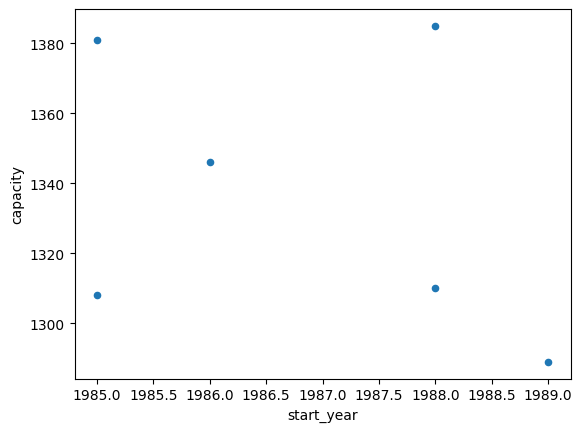

In [228]:
df.plot(kind="scatter", x="start_year", y="capacity")

In [ ]:
df.capacity.plot.barh(color="orange")

## Time Indexes

Indexes are very powerful. They are a big part of why Pandas is so useful. There are different indices for different types of data. Time Indexes are especially great when handling time-dependent data.

In [ ]:
time = pd.date_range(start="2021-01-01", end="2023-01-01", freq="D")
values = np.sin(2 * np.pi * time.dayofyear / 365)
ts = pd.Series(values, index=time)
ts.plot()

We can use Python's _slicing_ notation inside `.loc` to select a date range.

In [ ]:
ts.loc["2021-01-01":"2021-07-01"].plot()

In [ ]:
ts.loc["2021-05"].plot()

The `pd.TimeIndex` object has lots of useful attributes

In [ ]:
ts.index.month

In [ ]:
ts.index.day

Another common operation is to change the resolution of a dataset by resampling in time. Pandas exposes this through the [resample](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#resampling) function. The resample periods are specified using pandas [offset index](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases) syntax.

Below we resample the dataset by taking the mean over each month.

In [ ]:
ts.resample("M").mean().head()

In [ ]:
ts.resample("M").mean().plot()

## Reading and Writing Files

To read data into pandas, we can use for instance the [`pd.read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) function. This function is incredibly powerful and complex with a multitude of settings. You can use it to extract data from almost any text file.

The `pd.read_csv()` function can take a path to a local file as an input, or even a link to an online text file.

Let's import a slightly larger dataset about the power plant fleet in Europe_

In [ ]:
fn = "https://raw.githubusercontent.com/PyPSA/powerplantmatching/master/powerplants.csv"

In [ ]:
df = pd.read_csv(fn, index_col=0)
df.iloc[:5, :10]

In [ ]:
df.info()

In [ ]:
df.describe()

Sometimes, we also want to store a DataFrame for later use. There are many different file formats tabular data can be stored in,  including HTML, JSON, Excel, Parquet, Feather, etc. Here, let's say we want to store the DataFrame as CSV (comma-separated values) file under the name "tmp.csv".

In [ ]:
df.to_csv("tmp.csv")

## Groupby Functionality

Both `Series` and `DataFrame` objects have a `groupby` method. It accepts a variety of arguments, but the simplest way to think about it is that you pass another series, whose unique values are used to split the original object into different groups. `groupby` is an amazingly powerful but also complex function.

Here's an example which retrieves the total generation capacity per country.

In [ ]:
grouped = df.groupby("Country").Capacity.sum()
grouped.head()

Such **“chaining”** operations together is very common with pandas:

Let's break apart this operation a bit. The workflow with `groupby` can be divided into three general steps:

1. **Split**: Partition the data into different groups based on some criterion.
1. **Apply**: Do some caclulation within each group. Different types of steps might be
   - *Aggregation*: Get the mean or max within the group.
   - *Transformation*: Normalize all the values within a group.
   - *Filtration*: Eliminate some groups based on a criterion.
1. **Combine**: Put the results back together into a single object.

<img src="https://miro.medium.com/max/1840/1*JbF6nhrQsn4f-TaSF6IR9g.png" width="720px" />

In [ ]:
gb = df.groupby("Country")
gb

The length tells us how many groups were found:

In [ ]:
len(gb)

All of the groups are available as a dictionary via the `.groups` attribute:

In [ ]:
groups = gb.groups
len(groups)

In [ ]:
list(groups.keys())[:5]

Now that we know how to create a `GroupBy` object, let's learn how to do aggregation on it.

In [ ]:
gb.Capacity.sum().nlargest(5)

In [ ]:
gb["DateIn"].mean().head()

Grouping is not only possible on a single columns, but also on multiple columns. For instance,
we might want to group the capacities by country **and** fuel type. To achieve this, we pass a list of functions to the `groupby` functions.

In [ ]:
capacities = df.groupby(["Country", "Fueltype"]).Capacity.sum()
capacities

By grouping by multiple attributes, our index becomes a `pd.MultiIndex` (a hierarchical index with multiple *levels*.

In [ ]:
capacities.index[:5]

In [ ]:
type(capacities.index)

We can use the `.unstack` function to reshape the multi-indexed `pd.Series` into a `pd.DataFrame` which has the second index level as columns. 

In [ ]:
capacities.unstack().tail().T

## Exercises

### Power Plants Data

Run the function `.describe()` on the DataFrame that includes the power plant database:

In [ ]:
df.describe()

Provide a list of unique fuel types included in the dataset

In [ ]:
df.Fueltype.unique()

Provide a list of unique technologies included in the dataset

In [ ]:
df.Technology.unique()

Filter the dataset by power plants with the fuel type "Hard Coal"

In [ ]:
coal = df.loc[df.Fueltype == "Hard Coal"]
coal

Identify the 5 largest coal power plants. In which countries are they located? When were they built?

In [ ]:
coal.loc[coal.Capacity.nlargest(5).index]

Identify the power plant with the longest "Name".

In [ ]:
i = df.Name.map(lambda x: len(x)).argmax()
df.iloc[i]

Identify the 10 northernmost powerplants. What type of power plants are they?

In [ ]:
index = df.lat.nlargest(10).index
df.loc[index]

What is the average "DateIn" of each "Fueltype"? Which type of power plants is the oldest on average?

In [ ]:
df.groupby("Fueltype").DateIn.mean().sort_values()

Plot a histogram of power plant capacities with bins of length 100 MW between 0 and 4000 MW. What do you observe?

In [ ]:
df.Capacity.plot.hist(bins=np.arange(0, 4001, 100))

How many power plants of each fuel type are there in each country? Display the results in a DataFrame with countries as index and fuel type as columns. Fill missing values with the value zero. Convert all values to integers.

> Browse Google or the pandas documentation to find the right aggregation function to count values.

In [ ]:
df.groupby(["Country", "Fueltype"]).size().unstack().fillna(0.0).astype(int)

### Time Series Analysis

Read in the time series from the second lecture into a DataFrame.

The file is available at https://tubcloud.tu-berlin.de/s/pKttFadrbTKSJKF/download/time-series-lecture-2.csv. and includes hourly time series for Germany in 2015 for:
    
1. electricity demand from [OPSD](https://open-power-system-data.org/) in GW
2. onshore wind capacity factors from [renewables.ninja](https://www.renewables.ninja/) in per-unit of installed capacity
3. offshore wind capacity factors from [renewables.ninja](https://www.renewables.ninja/) in per-unit of installed capacity
4. solar PV capacity factors from [renewables.ninja](https://www.renewables.ninja/) in per-unit of installed capacity
5. electricity day-ahead spot market prices in €/MWh from EPEX Spot zone DE/AT/LU retrieved via [SMARD platform](https://www.smard.de/home)

Use the function `pd.read_csv` with the keyword arguments `index_col=` and `parse_dates=` to ensure the
time stamps are treated as `pd.DatetimeIndex`.

In [ ]:
# your code here

The start of the DataFrame should look like this:

|                     |   load |   onwind |   offwind |   solar |   prices |
|:--------------------|-------:|---------:|----------:|--------:|---------:|
| 2015-01-01 00:00:00 | 41.151 |   0.1566 |    0.703  |       0 |      nan |
| 2015-01-01 01:00:00 | 40.135 |   0.1659 |    0.6875 |       0 |      nan |
| 2015-01-01 02:00:00 | 39.106 |   0.1746 |    0.6535 |       0 |      nan |
| 2015-01-01 03:00:00 | 38.765 |   0.1745 |    0.6803 |       0 |      nan |
| 2015-01-01 04:00:00 | 38.941 |   0.1826 |    0.7272 |       0 |      nan |

And it should pass the following test:

`assert type(df.index) == pd.DatetimeIndex`

For each column:
- What are the average, minimum and maximum values?
- Find the time stamps where data on prices is missing.
- Fill up the missing data with the prices observed one week ahead.
- Plot the time series for the full year.
- Plot the time series for the month May.
- Resample the time series to daily, weeky, and monthly frequencies and plot the resulting time series in one graph.
- Sort the values in descending order and plot the duration curve. *Hint: Run `.reset_index(drop=True)` to drop the index after sorting.*
- Plot a histogram of the time series values.
- Perform a Fourier transformation of the time series. What are the dominant frequencies? *Hint: Below you can find an example how Fourier transformation can be down with `numpy`.*
- Calculate the Pearson correlation coefficients between all time series. *Hint: There is a function for that. Google for "pandas dataframe correlation".*

`abs(pd.Series(np.fft.rfft(df.solar - df.solar.mean()), index=np.fft.rfftfreq(len(df.solar), d=1./8760))**2)`

In [ ]:
# your code here